In [6]:
!pip install gensim


In [7]:
import gensim

import gensim.downloader

import numpy as np

Part 1: Word Embeddings

In [8]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['dog']

# Getting the most similar words

print(model.most_similar('dog'))

# Getting the similarity between two words

print(model.similarity('dog', 'cat'))


[('cat', 0.8798074126243591), ('dogs', 0.8344309329986572), ('pet', 0.7449564337730408), ('puppy', 0.7236376404762268), ('horse', 0.7109653949737549), ('animal', 0.6817063093185425), ('pig', 0.655417263507843), ('boy', 0.6545307636260986), ('cats', 0.6471933126449585), ('rabbit', 0.6468630433082581)]
0.87980753


Part 1a

In [9]:

#find the most similar words to a word of your choice. 
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group

In [10]:
print(model.most_similar('eagle'))

[('golden', 0.583360493183136), ('feather', 0.5817554593086243), ('bald', 0.5801385641098022), ('mountain', 0.5667827129364014), ('putt', 0.5514019131660461), ('flying', 0.5471068620681763), ('pine', 0.5439280271530151), ('birdie', 0.5417095422744751), ('beaver', 0.5416334867477417), ('lone', 0.5396599173545837)]


These results make sense because they are describing what people think of when they hear eagle.

In [11]:
model['cat']

array([ 0.23088  ,  0.28283  ,  0.6318   , -0.59411  , -0.58599  ,
        0.63255  ,  0.24402  , -0.14108  ,  0.060815 , -0.7898   ,
       -0.29102  ,  0.14287  ,  0.72274  ,  0.20428  ,  0.1407   ,
        0.98757  ,  0.52533  ,  0.097456 ,  0.8822   ,  0.51221  ,
        0.40204  ,  0.21169  , -0.013109 , -0.71616  ,  0.55387  ,
        1.1452   , -0.88044  , -0.50216  , -0.22814  ,  0.023885 ,
        0.1072   ,  0.083739 ,  0.55015  ,  0.58479  ,  0.75816  ,
        0.45706  , -0.28001  ,  0.25225  ,  0.68965  , -0.60972  ,
        0.19578  ,  0.044209 , -0.31136  , -0.68826  , -0.22721  ,
        0.46185  , -0.77162  ,  0.10208  ,  0.55636  ,  0.067417 ,
       -0.57207  ,  0.23735  ,  0.4717   ,  0.82765  , -0.29263  ,
       -1.3422   , -0.099277 ,  0.28139  ,  0.41604  ,  0.10583  ,
        0.62203  ,  0.89496  , -0.23446  ,  0.51349  ,  0.99379  ,
        1.1846   , -0.16364  ,  0.20653  ,  0.73854  ,  0.24059  ,
       -0.96473  ,  0.13481  , -0.0072484,  0.33016  , -0.1236

In [12]:
print(model.most_similar('python', topn=10))

[('monty', 0.6886237263679504), ('php', 0.586538553237915), ('perl', 0.57844078540802), ('cleese', 0.5446676015853882), ('flipper', 0.5112984776496887), ('ruby', 0.5066928267478943), ('spamalot', 0.505638837814331), ('javascript', 0.5030568838119507), ('reticulated', 0.4983375668525696), ('monkey', 0.49764129519462585)]


In [13]:
model['berlin']

array([ 0.69796  ,  0.026999 ,  0.068505 ,  0.065858 ,  0.40963  ,
       -0.38146  , -0.56633  , -0.045967 , -0.019801 ,  0.40051  ,
        0.45928  , -0.44242  , -0.25291  ,  0.56519  , -0.42689  ,
        0.66001  ,  0.74877  , -0.61531  , -0.93373  , -0.70314  ,
        0.25014  ,  0.47758  , -0.27972  ,  0.10961  , -0.18595  ,
       -1.1541   ,  0.014234 , -0.15504  ,  1.2269   , -0.083134 ,
       -0.96295  ,  0.26263  , -0.10777  ,  0.2001   , -0.60195  ,
        0.60761  ,  1.1275   , -0.032634 , -0.69365  ,  0.071476 ,
        0.14524  , -0.56237  , -0.1676   ,  0.71003  ,  0.39329  ,
       -0.60368  ,  0.63867  , -0.19897  ,  0.35546  ,  0.50909  ,
        0.32231  , -0.58378  ,  0.061194 ,  0.58127  , -1.3054   ,
       -2.2658   , -0.0047571,  0.27903  ,  0.12816  ,  0.09481  ,
        0.15086  ,  1.0745   , -0.83654  ,  0.10862  ,  0.15205  ,
        0.17329  , -0.52959  ,  0.72439  , -0.40303  ,  0.11472  ,
       -0.32336  , -0.83121  , -0.12508  ,  0.053349 , -0.1748

In [14]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))



[('paris', 0.8827143311500549), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174600601196), ('berlin', 0.6665561199188232), ('brussels', 0.6574430465698242), ('lyon', 0.6526200771331787), ('london', 0.64079749584198), ('le', 0.6403627991676331), ('strasbourg', 0.6346526145935059)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.45332765579223633), ('non-arabs', 0.45208773016929626), ('amerindians', 0.4478238821029663), ('buffalos', 0.4475123882293701), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.4440663158893585), ('dingos', 0.44403281807899475)]
[('dogs', 0.8921768665313721), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512702345848083), ('pets', 0.7392118573188782), ('cows', 0.6835324168205261), ('pet', 0.679297685623169), ('horses', 0.6774964332580566), ('pigs', 0.6755765080451965), ('animal', 0.6683686971664429)]


In [15]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)



[('menstruating', 0.6102039813995361), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693746566772), ('uterus', 0.5093088746070862), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483376502991), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.42151397466659546), ('nistelrooy', 0.41140034794807434), ('strachan', 0.4089668393135071), ('rafa', 0.40728434920310974), ('technicals', 0.4060872495174408), ('allardyce', 0.4018688201904297), ('boss', 0.40107354521751404), ('rangers', 0.39962300658226013), ('utd', 0.3967454135417938)]


[('doctor', 0.8661209940910339),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793617010116577),
 ('pregnant', 0.6787967085838318),
 ('patient', 0.6772218346595764),
 ('dentist', 0.6694242358207703),
 ('mother', 0.6586815714836121),
 ('medical', 0.6466937065124512)]

Part 1b

In [16]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 
#does this show any bias or assumptions in the data? 
# Discuss with your group and share most interesting dimension in the document

In [17]:

from sklearn.metrics.pairwise import cosine_similarity

dimension_index = 10
dimension_vector = np.zeros_like(model['dog'])
dimension_vector[dimension_index] = 1.0
dimension_index = 10
dimension_vector = np.zeros_like(model['dog'])
dimension_vector[dimension_index] = 1.0

words_to_modify = ['africa', 'china', 'russia']
modified_embeddings = {word: model[word] + dimension_vector for word in words_to_modify}

# Print the modified embeddings
for word, embedding in modified_embeddings.items():
    print(f"Modified embedding for {word}: {embedding[:5]}...")  # Show just first 5 dimensions for clarity
    
    # Find similar words to the modified embedding
    similar_words = model.most_similar([embedding], topn=5)
    print(f"Words similar to modified '{word}':")
    for similar_word, similarity in similar_words:
        print(f"  {similar_word}: {similarity:.4f}")
    print()

# Also show what words are most affected by this dimension
dimension_effect = []
for word in model.index_to_key[:5000]:  # Check first 5000 words for efficiency
    original_vec = model[word]
    # Create similarity between original word and word + dimension
    sim = cosine_similarity(original_vec.reshape(1, -1), 
                           (original_vec + dimension_vector).reshape(1, -1))[0][0]
    effect = 1 - sim  # Higher effect = lower similarity = more change
    dimension_effect.append((word, effect))


Modified embedding for africa: [-0.28641   0.8405    1.1178    0.18766   0.073111]...
Words similar to modified 'africa':
  africa: 0.9872
  african: 0.7992
  asia: 0.7652
  continent: 0.7634
  australia: 0.7559

Modified embedding for china: [0.35996 0.45571 1.1417  0.45611 0.9601 ]...
Words similar to modified 'china':
  china: 0.9895
  beijing: 0.8237
  chinese: 0.8151
  taiwan: 0.8018
  mainland: 0.7597

Modified embedding for russia: [0.21537 0.71956 1.7838  1.2954  0.3855 ]...
Words similar to modified 'russia':
  russia: 0.9892
  ukraine: 0.8485
  russian: 0.7925
  moscow: 0.7845
  belarus: 0.7713



The words tested didn't have bias in the most similiar words list. I specifically chose words that people make a decent amount of assumptions about, yet none appeared.

Part 2: Visualization and Embeddings in Space

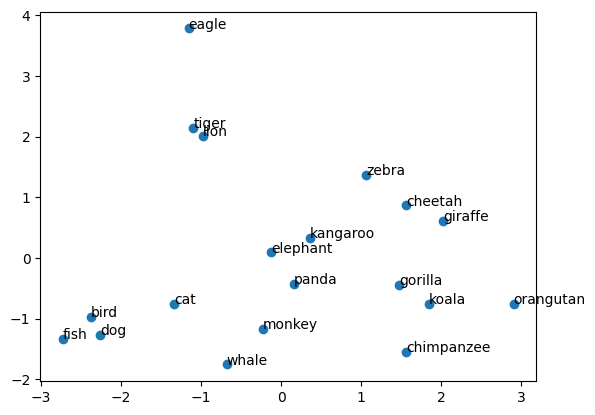

In [18]:
#visualize pca of word embeddings
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

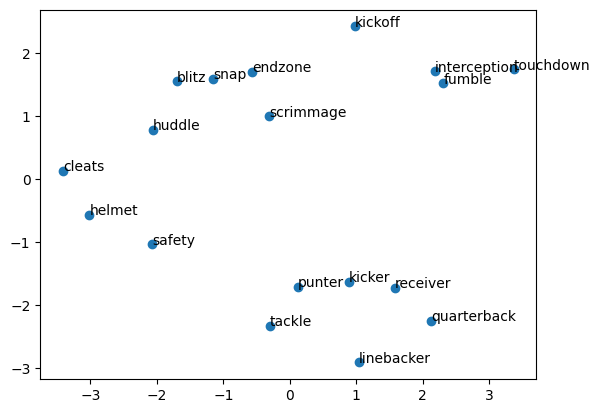

In [19]:
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.

words = ["touchdown", "quarterback", "receiver", "linebacker", "kicker", "punter", "snap", "huddle", "blitz", "interception", "fumble", "safety", "tackle", "endzone", "helmet", "cleats", "kickoff", "scrimmage"]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()


Yeah, overall the plot makes sense. You can see that words like "touchdown," "interception," and "fumble" are grouped together—they’re all big game events, so that checks out. The strategy-related stuff like "snap," "scrimmage," and "endzone" are close too, which fits. I also noticed the positions like "quarterback," "receiver," and "linebacker" hang out near each other, even if linebacker is technically defense—it’s still mentioned in similar contexts, so that probably explains it.

Some groupings stand out as especially logical—like "punter" and "kicker" being right next to each other. "Helmet" and "cleats" being off to the side also makes sense since they’re equipment. Only thing that felt a little isolated was "huddle," but I guess it doesn’t directly tie to gear or specific players, so that adds up too.

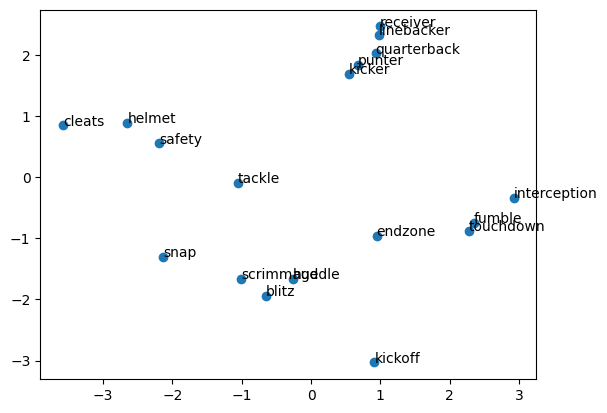

In [20]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?

# Load the GloVe Twitter 100-dimensional model
twitter_model = gensim.downloader.load("glove-twitter-100")

words = ["touchdown", "quarterback", "receiver", "linebacker", "kicker", "punter", 
         "snap", "huddle", "blitz", "interception", "fumble", "safety", 
         "tackle", "endzone", "helmet", "cleats", "kickoff", "scrimmage"]

# Get word embeddings from the model
X = [twitter_model[word] for word in words]

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i, 0], X_pca[i, 1]))

plt.show()


The embedding space definitely shifted after switching to the GloVe Twitter model. You can tell the positions and roles—like quarterback, receiver, kicker, punter, linebacker—are way more tightly grouped now, almost stacked on top of each other. That probably reflects how people on Twitter talk about those positions together a lot, like in quick recaps or tweets during games.

At the same time, stuff like "kickoff" is way off on its own now, which kind of makes sense—Twitter folks might use it in other ways too, like metaphorically ("kickoff the week"), not just football. Strategy words like "snap," "scrimmage," and "huddle" are also more spread out compared to before, which might be because they’re used differently or in different combos on social media.

Part 3: Embedding reddit posts

In [21]:
import pandas as pd

#read in uiuc csv
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])




In [22]:
#using the code from project 1, clean the text and create a bag of words representation of the text
import spacy
from sklearn.feature_extraction.text import CountVectorizer

language_model = spacy.load("en_core_web_sm")

def lemmatize(text):
    doc = language_model(text)
    tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]
    return ' '.join(tokens)

data['lemmatized_text'] = data['text'].apply(lemmatize)
vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1, 2))
bag_of_words = vectorizer.fit_transform(data['lemmatized_text'])

In [23]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set

#color by the "label" column to see if the two subreddits are separable in the embedding space

# is there a clear separation between the two columns? 

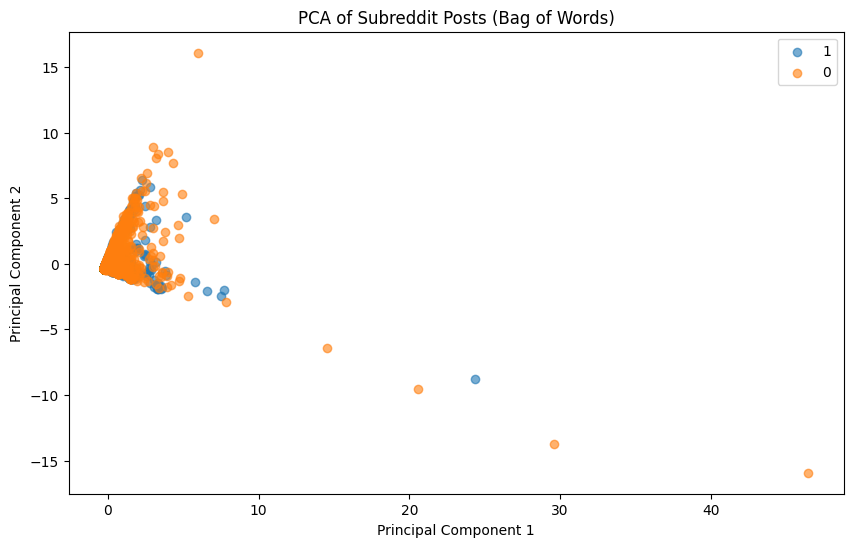

In [24]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(bag_of_words.toarray())

# Create a DataFrame for plotting
pca_df = pd.DataFrame(reduced, columns=['PC1', 'PC2'])
pca_df['label'] = data['label'].values

# Plot with color based on subreddit label
plt.figure(figsize=(10, 6))
for label in pca_df['label'].unique():
    subset = pca_df[pca_df['label'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=label, alpha=0.6)

plt.title('PCA of Subreddit Posts (Bag of Words)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

There is not a clear separation between the two columns, it looks like they are very overlapping

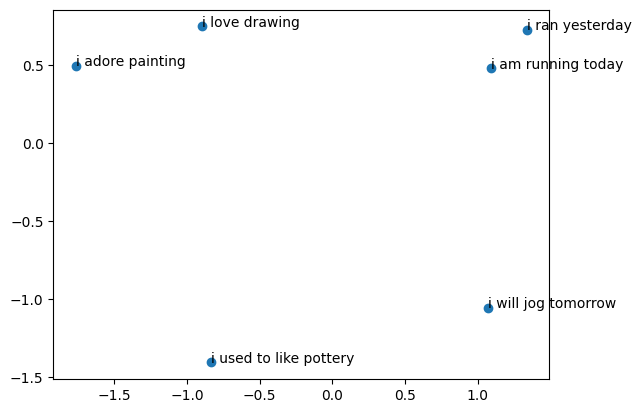

In [25]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#remove nan values
avg_embeddings=[embedding for embedding in avg_embeddings if not np.isnan(embedding).any()]
#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

In [26]:

#use this function to calculate the average embedding of each post in the dataset

#plot the pca of the average embeddings, color by the "label" column

#how is this plot different from the previous one?

#is there clear separation? 

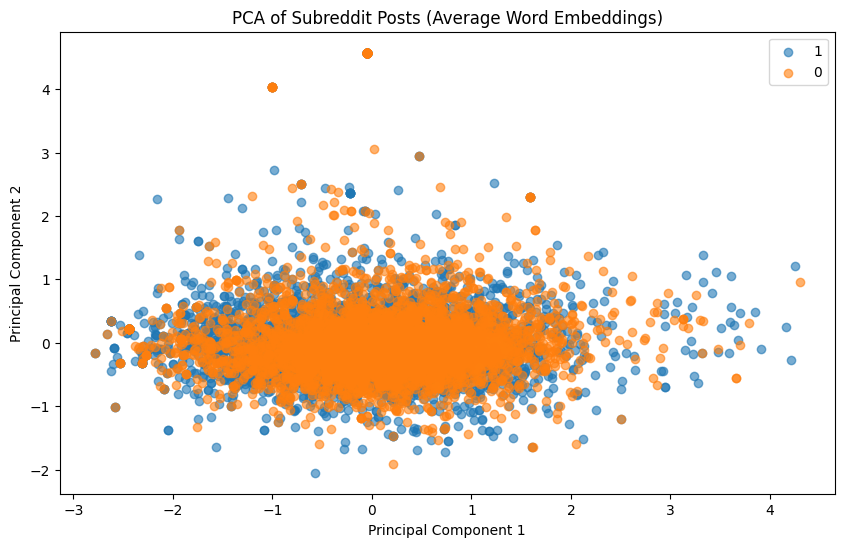

In [27]:


# Load the embedding model
model = gensim.downloader.load("glove-twitter-100")

# Average embedding function
def avg_embedding(sentence, model):
    words = sentence.split()
    embeddings = [model[word] for word in words if word in model]
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.nan  # fallback if no words in model

# Calculate average embeddings for each post
data['avg_embedding'] = data['lemmatized_text'].apply(lambda text: avg_embedding(text, model))

# Remove NaN embeddings
valid_data = data[~data['avg_embedding'].isna()].copy()
X = np.vstack(valid_data['avg_embedding'].values)

# PCA to reduce dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create plot
plt.figure(figsize=(10, 6))
for label in valid_data['label'].unique():
    subset = X_pca[valid_data['label'] == label]
    plt.scatter(subset[:, 0], subset[:, 1], label=label, alpha=0.6)

plt.title('PCA of Subreddit Posts (Average Word Embeddings)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


This plot definitely looks different from the last one. Since it’s using average word embeddings instead of bag-of-words, the data points are way more spread out and not all bunched up in the bottom-left like before. The embedding approach actually captures the meaning of the words, so posts that say similar things—even with different words—end up closer together.

That said, there’s still no super clear separation between the two subreddits. There’s a lot of overlap, even though some parts are a little more orange or blue. So while this method gives a more meaningful representation overall, it's still not enough to fully tell the two groups apart just by looking at a 2D plot

Part 4: HuggingFace and BERT

In [ ]:
%pip install transformers
%pip install torch torchvision torchaudio

In [ ]:
%pip install torch transformers

In [30]:
import os
os.environ["TRANSFORMERS_NO_TF"] = "1"  # Prevent Transformers from using TensorFlow
os.environ["PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION"] = "python"  # Optional, avoids protobuf C-API issues

from transformers import pipeline

pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use mps:0


Made changes.

In [31]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class")

[{'label': 'POS', 'score': 0.9923704862594604}]

In [36]:
#use the pipeline to classify the sentiment of all posts in the reddit dataset
#report the most common sentiment label

In [50]:
results = pipe(data['lemmatized_text'].tolist(), batch_size=4)
data['sentiment'] = [r['label'] for r in results]
data['confidence'] = [r['score'] for r in results]
most_common = data['sentiment'].value_counts().idxmax()
count = data['sentiment'].value_counts().max()
print(f"The most common sentiment label is: {most_common} ({count} posts)")


The most common sentiment label is: NEU (6491 posts)


In [ ]:
#look at ten sample posts and labels; do you agree with all of them? 

In [54]:
sample = data[['text', 'lemmatized_text', 'sentiment', 'confidence']].sample(10)

for i, row in sample.iterrows():
    print(f"Lemmatized:    {row['lemmatized_text']}")
    print(f"Prediction:    {row['sentiment']} (Confidence: {row['confidence']:.2f})")
    print("-" * 80)


Lemmatized:    Wingstop count tendie
Prediction:    NEU (Confidence: 0.89)
--------------------------------------------------------------------------------
Lemmatized:    university computer bitcoin 2008 2012
Prediction:    NEU (Confidence: 0.95)
--------------------------------------------------------------------------------
Lemmatized:    say open study room need 2 people minimum reservation
Prediction:    NEU (Confidence: 0.98)
--------------------------------------------------------------------------------
Lemmatized:    gym list pretty walkable terminal like spread word want crowd  
Prediction:    NEU (Confidence: 0.93)
--------------------------------------------------------------------------------
Lemmatized:    look like UIUC state school admit shell state tuition make wonder overpay administration
Prediction:    NEG (Confidence: 0.59)
--------------------------------------------------------------------------------
Lemmatized:    w bad lot hard need def manageable like ap stat 

For some text, they are so short, so for me it is hard to gauge the correct sentiment of these posts. This is where I have my concerns.

In [ ]:
#is the UIUC or Michigan subreddit more negative?

In [55]:
sentiment_map = {'NEG': -1, 'NEU': 0, 'POS': 1}
data['sentiment_score'] = data['sentiment'].map(sentiment_map)
avg_sentiment_by_subreddit = data.groupby('label')['sentiment_score'].mean()
print(avg_sentiment_by_subreddit)

label
0   -0.032381
1   -0.004656
Name: sentiment_score, dtype: float64


Looks like UMich subreddit is more negative